In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Unsupervised.csv")


In [3]:
X = data.iloc[:, 1:].values


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

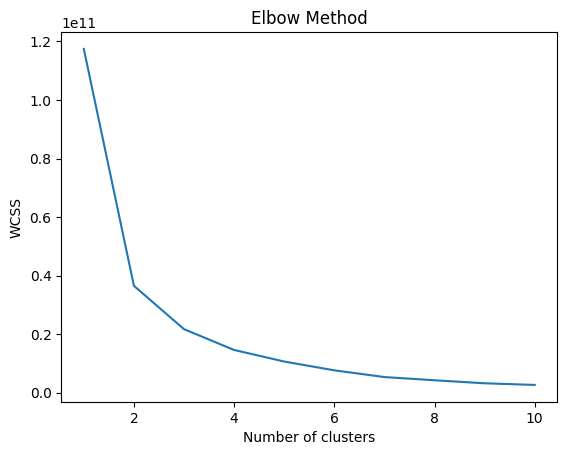

In [4]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


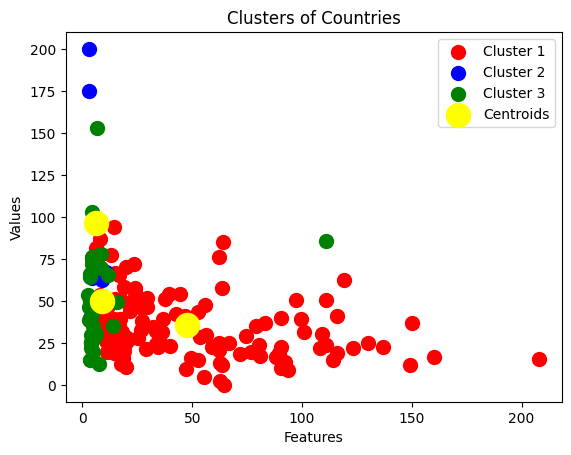

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Countries')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.show()


In [6]:
cluster_means = pd.DataFrame(X).groupby(y_kmeans).mean()
print(cluster_means)


           0          1         2          3             4         5  \
0  47.389844  35.865617  6.332031  45.921609   8569.242188  8.957648   
1   6.228571  96.442857  5.712857  68.571429  80342.857143  6.388714   
2   8.800000  49.978125  8.991563  46.021875  37621.875000  3.383312   

           6         7             8  
0  67.873437  3.263359   4438.390625  
1  80.285714  1.767143  65442.857143  
2  79.156250  1.944687  35587.500000  


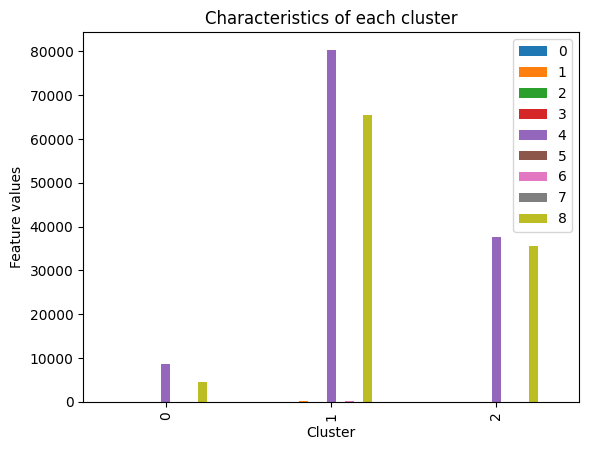

In [7]:
cluster_means.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Feature values')
plt.title('Characteristics of each cluster')
plt.show()


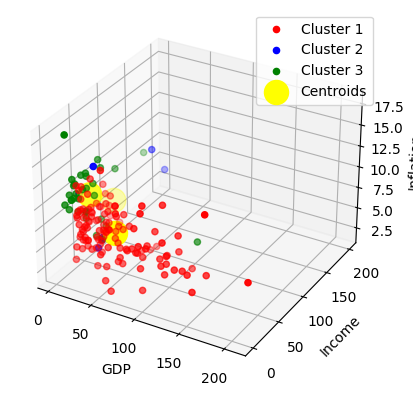

In [8]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[:,0]
y = X[:,1]
z = X[:,2]

ax.scatter(x[y_kmeans == 0], y[y_kmeans == 0], z[y_kmeans == 0], c='red', label='Cluster 1')
ax.scatter(x[y_kmeans == 1], y[y_kmeans == 1], z[y_kmeans == 1], c='blue', label='Cluster 2')
ax.scatter(x[y_kmeans == 2], y[y_kmeans == 2], z[y_kmeans == 2], c='green', label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
ax.set_xlabel('GDP')
ax.set_ylabel('Income')
ax.set_zlabel('Inflation')
ax.legend()

plt.show()


In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X, y_kmeans)


0.7003508054481694

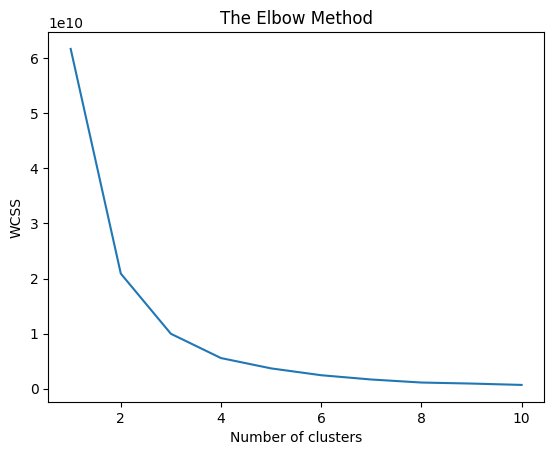

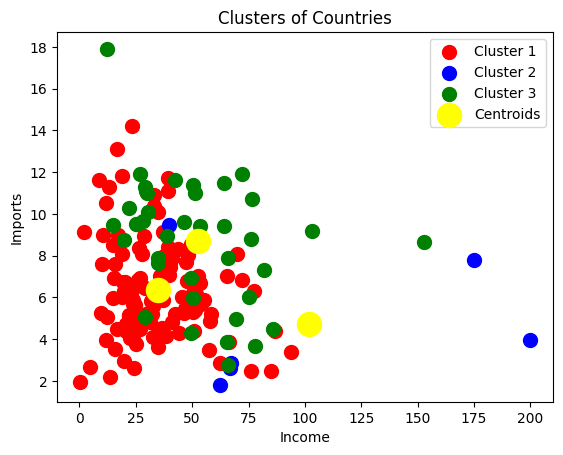

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = data.iloc[:, [2, 3, 5]].values

# determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Countries')
plt.xlabel('Income')
plt.ylabel('Imports')
plt.legend()
plt.show()


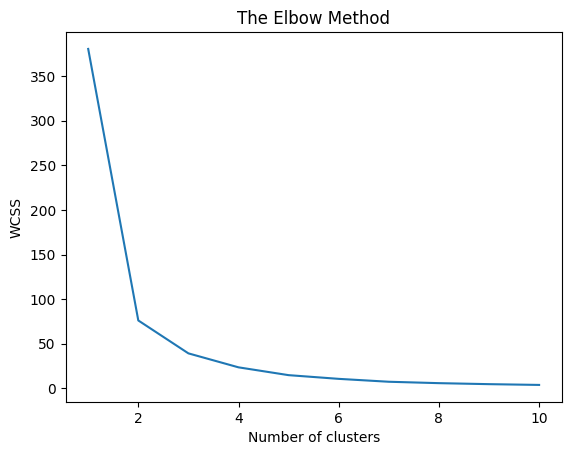

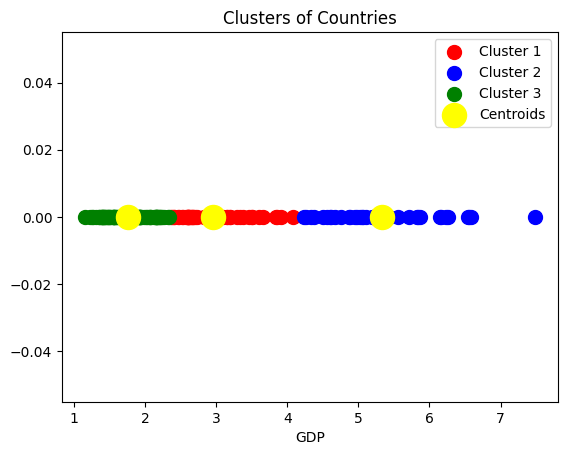

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# select 'GDP' column
X = data.iloc[:, 8].values.reshape(-1, 1)

# determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# visualize the clusters
plt.scatter(X[y_kmeans == 0], np.zeros((len(X[y_kmeans == 0]), 1)), s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1], np.zeros((len(X[y_kmeans == 1]), 1)), s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2], np.zeros((len(X[y_kmeans == 2]), 1)), s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], np.zeros((len(kmeans.cluster_centers_), 1)), s=300, c='yellow', label='Centroids')
plt.title('Clusters of Countries')
plt.xlabel('GDP')
plt.legend()
plt.show()


The Softmax function is commonly used in the output layer of a neural network for multiclass classification problems. It takes a vector of real numbers as input and normalizes it into a probability distribution where the sum of all probabilities is equal to 1. The function maps the input vector to a probability distribution in such a way that the highest input value gets assigned the highest probability, and the lowest input value gets assigned the lowest probability. The ReLU (Rectified Linear Unit) function is an activation function used in neural networks that returns the input if it is positive, and 0 if it is negative. The ReLU function helps to improve the training of neural networks by speeding up the convergence of the gradient descent algorithm.

Weights in a neural network are initialized randomly to break the symmetry and allow the network to learn different features during training. There are different methods to initialize the weights, such as random initialization, Xavier initialization, and He initialization. Random initialization assigns random weights from a Gaussian distribution with a mean of 0 and a standard deviation of 1. Xavier initialization scales the weights based on the size of the input and output layers. He initialization is similar to Xavier initialization but is better suited for deep neural networks.

The different layers of a CNN (Convolutional Neural Network) include the input layer, convolutional layer, pooling layer, and fully connected layer. The input layer receives the raw input data, such as an image. The convolutional layer applies a set of filters to the input data to extract feature maps. The pooling layer downsamples the feature maps to reduce the spatial dimensionality of the data. The fully connected layer connects every neuron in the previous layer to every neuron in the current layer to produce the final output.

Dropout is a regularization technique used in neural networks to prevent overfitting. It randomly drops out some neurons during training, forcing the network to learn multiple independent representations of the same data. Dropout helps to reduce the dependence on any single neuron and encourages the network to learn more robust features. During testing, all neurons are used, and their outputs are scaled to account for the dropout during training.



